In [39]:
%load_ext autoreload
import pandas as pd
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib.cm import ScalarMappable
from scipy.ndimage import gaussian_filter
from functools import partial
from IPython.display import clear_output

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
%autoreload 2
from data import clean_all_files, open_data
from utils import summary, visualise, string_to_color, visualise_at_interval, convertImage

In [32]:
clean_all_files()

cleaning file raw/2023_place_canvas_history-000000000000.csv
cleaning file raw/2023_place_canvas_history-000000000001.csv


In [3]:
data = open_data("2023_place_canvas_history-000000000000.csv")

startingImage = [["#FFFFFF" for i in range(1000)] for i in range(1000)]

rez = summary(
    pd.Timestamp("2023-07-20 13:00:26.088 UTC"),
    pd.Timestamp("2023-07-20 16:00:26.088 UTC"),
    startingImage,
    data ,
    lambda x, y, is_mod  : y,
)

rez[0][10:20]

start loading file: 2023_place_canvas_history-000000000000.csv
loaded file : 2023_place_canvas_history-000000000000.csv


['#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF',
 '#FFFFFF']

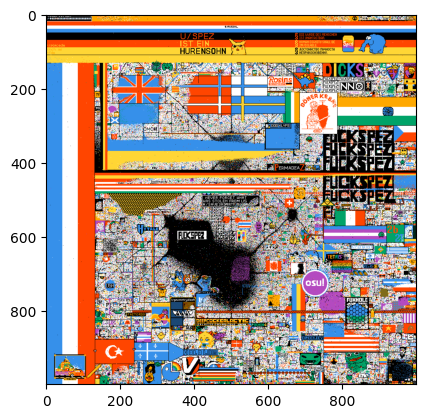

In [23]:
visualise(rez, string_to_color)

In [9]:
visualise_at_interval(
    lambda x, y, is_mod  : y, 
    lambda l : [convertImage(x,string_to_color) for x in l], 
    pd.Timedelta(minutes = 15), 
    [["#FFFFFF" for i in range(1000)] for i in range(1000)],
    "image",
) 

start loading file: 2023_place_canvas_history-000000000000.csv
start formating data
loaded file : 2023_place_canvas_history-000000000000.csv
just made summary until  2023-07-20 13:15:26.088000+00:00
just made summary until  2023-07-20 13:30:26.088000+00:00
just made summary until  2023-07-20 13:45:26.088000+00:00
just made summary until  2023-07-20 14:00:26.088000+00:00
just made summary until  2023-07-20 14:15:26.088000+00:00
just made summary until  2023-07-20 14:30:26.088000+00:00
just made summary until  2023-07-20 14:45:26.088000+00:00
just made summary until  2023-07-20 15:00:26.088000+00:00
just made summary until  2023-07-20 15:15:26.088000+00:00
just made summary until  2023-07-20 15:30:26.088000+00:00
just made summary until  2023-07-20 15:45:26.088000+00:00
start loading file: 2023_place_canvas_history-000000000001.csv
start formating data
loaded file : 2023_place_canvas_history-000000000001.csv
just made summary until  2023-07-20 16:00:26.088000+00:00
just made summary unti

In [35]:
def get_transform(images, blur = 0):
    blurImages =[gaussian_filter(np.array(img), blur) for img in images]
    maximum = np.max(blurImages)
    custom_cmap = ScalarMappable(cmap='RdBu_r', norm=LogNorm(vmin=1, vmax=maximum + 1))
    return [custom_cmap.to_rgba(img, bytes= True) for img in blurImages]


In [ ]:

visualise_at_interval(
    lambda x, y, is_mod  : x + 1, 
    get_transform,
    pd.Timedelta(minutes = 15), 
    np.zeros((1000,1000)),
    "activite",
    duration = pd.Timedelta(minutes = 30),
) 

In [23]:

visualise_at_interval(
    lambda x, y, is_mod  : x + 1, 
    get_transform, 
    pd.Timedelta(minutes = 15), 
    np.zeros((1000,1000)),
    "activite_total",
) 

start loading file: 2023_place_canvas_history-000000000000.csv
start formating data
loaded file : 2023_place_canvas_history-000000000000.csv
just made summary until  2023-07-20 13:15:26.088000+00:00
just made summary until  2023-07-20 13:30:26.088000+00:00
just made summary until  2023-07-20 13:45:26.088000+00:00
just made summary until  2023-07-20 14:00:26.088000+00:00
just made summary until  2023-07-20 14:15:26.088000+00:00
just made summary until  2023-07-20 14:30:26.088000+00:00
just made summary until  2023-07-20 14:45:26.088000+00:00
just made summary until  2023-07-20 15:00:26.088000+00:00
just made summary until  2023-07-20 15:15:26.088000+00:00
just made summary until  2023-07-20 15:30:26.088000+00:00
just made summary until  2023-07-20 15:45:26.088000+00:00
start loading file: 2023_place_canvas_history-000000000001.csv
start formating data
loaded file : 2023_place_canvas_history-000000000001.csv
just made summary until  2023-07-20 16:00:26.088000+00:00
just made summary unti

In [40]:
for blur in [1,2,5,10,50,100]:
    visualise_at_interval(
        lambda x, y, is_mod  : x + 1, 
        partial(get_transform, blur = blur), 
        pd.Timedelta(minutes = 15), 
        np.zeros((1000,1000)),
        f"activite_blur_{blur}",
        duration = pd.Timedelta(minutes = 30),
    ) 
    clear_output()